In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [2]:
url = 'diabetes.csv'
df_diabetes = pd.read_csv(url)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
x_train, x_test, y_train, y_test, = train_test_split(df_diabetes.drop('Outcome', axis=1), df_diabetes['Outcome'],test_size =0.3) 

In [5]:
x_train.shape , x_test.shape

((537, 8), (231, 8))

In [6]:
y_train.shape , y_test.shape

((537,), (231,))

In [7]:
clf = DecisionTreeClassifier()

In [8]:
clf = clf.fit(x_train, y_train)

In [9]:
clf.feature_importances_

array([0.07147317, 0.28915247, 0.12937077, 0.03468435, 0.05563451,
       0.18945007, 0.10372756, 0.1265071 ])

In [10]:
for feature, importancia in zip(df_diabetes.columns, clf.feature_importances_):
    print('{}:{}'.format(feature, importancia))

Pregnancies:0.07147317046162618
Glucose:0.28915247331695826
BloodPressure:0.12937076618050178
SkinThickness:0.034684348619028214
Insulin:0.05563450771276128
BMI:0.18945007073098913
DiabetesPedigreeFunction:0.10372756184164489
Age:0.12650710113649025


In [11]:
resultado = clf.predict(x_test)
resultado

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [12]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [13]:
#conda install -c anaconda pydot
#conda install -c anaconda graphviz
#conda install -c conda-forge ipywidgets

In [14]:
!pip install graphviz

In [15]:
import pydot
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\vilqu\anaconda3\envs\teste\Library\bin\graphviz'

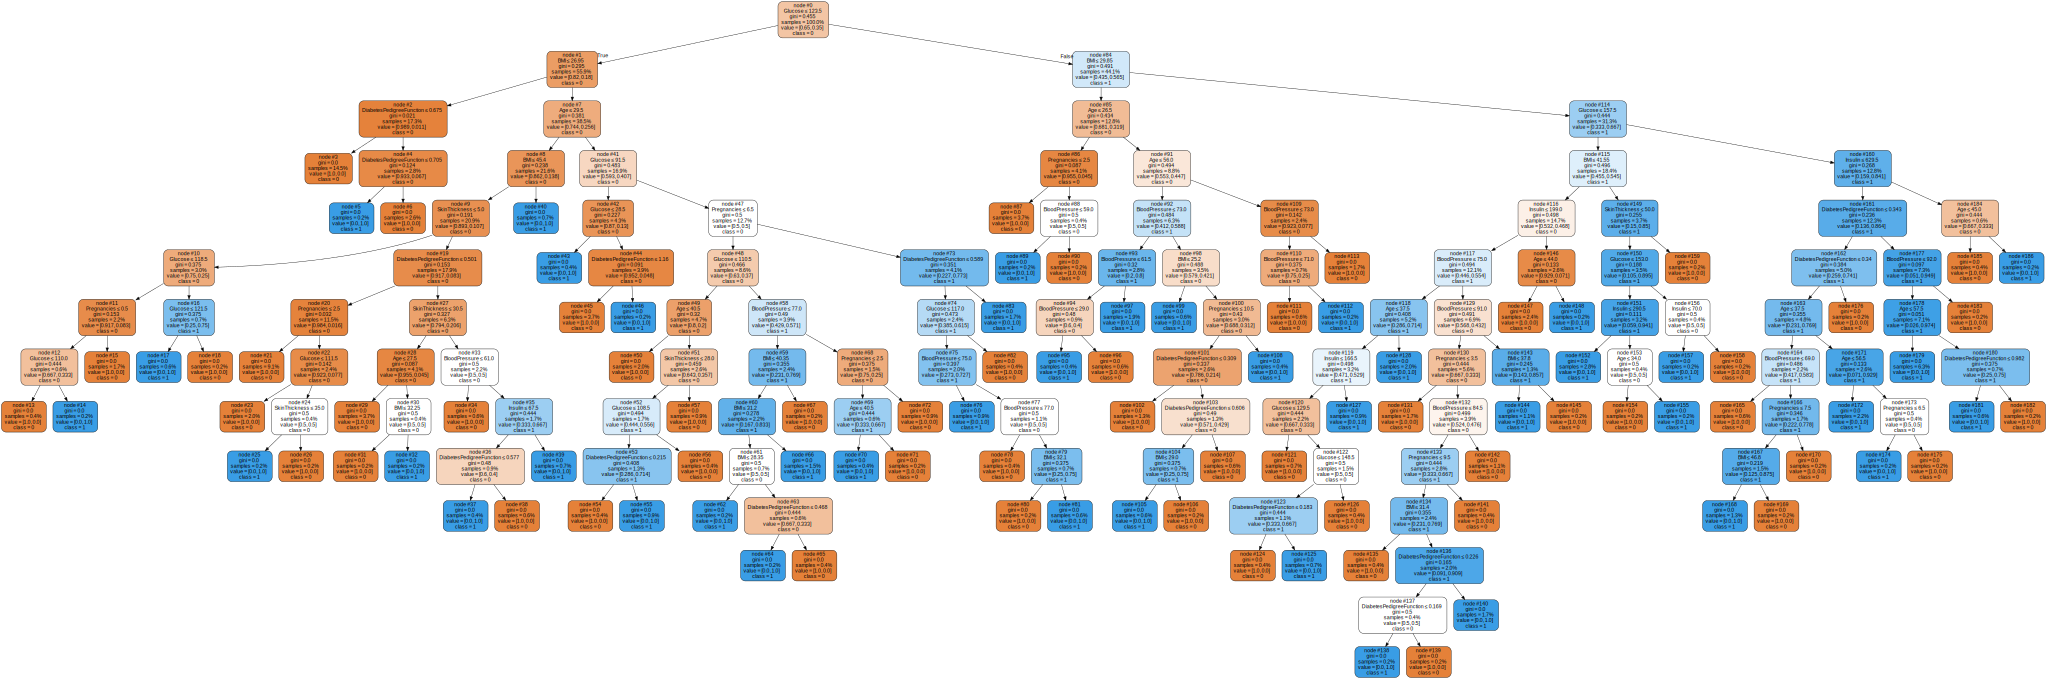

In [16]:
dot_data = export_graphviz(
                clf, 
                out_file=None, 
                feature_names = df_diabetes.drop('Outcome', axis=1).columns,
                class_names = ['0','1'],
                filled = True,
                rounded = True,
                proportion = True,
                node_ids=True,
                label='all',
                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [17]:
from ipywidgets import interactive
from IPython.display import SVG, display
from graphviz import Source

In [19]:
x, y = df_diabetes.drop('Outcome', axis=1), df_diabetes['Outcome']
features_label = df_diabetes.drop('Outcome', axis=1).columns
class_label = ['0', '1']

def plot_tree(crit, split, depth, min_samples_split, min_samplesleaf=0.2):
    estimator = DecisionTreeClassifier(
                random_state=0,
                criterion= crit,
                splitter= split,
                max_depth= depth,
                min_samples_split= min_samples_split,
                min_samples_leaf= min_samplesleaf
                )
    estimator.fit(x, y)
    graph = Source(export_graphviz(
            estimator,
            out_file=None,
            feature_names=features_label,
            class_names=class_label,
            impurity=True,
            filled=True
            ))
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter = interactive(plot_tree,
                   crit = ['gini', 'entropy'],
                   split = ['best', 'random'],
                   depth = [1, 2, 3, 4 , 5, 10, 20, 30],
                   min_samples_split=(1, 5),
                   min_samples_leaf=(1, 5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…